<a href="https://colab.research.google.com/github/Pranjita1/classification/blob/master/Amazon_reviews_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis from amazon product reviews for baby products

This notebook contains analysis of customer sentiments, considering a logistic regression (classification) point of view.

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('amazon_baby.csv')

In [0]:
df.head(10)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


In [0]:
df.shape

(183531, 3)

In [0]:
df.isnull().sum()

name      318
review      0
rating      0
dtype: int64

In [0]:
df = df.fillna({'review':''})  # fill in N/A's in the review column

In [0]:
def remove_punctuation(text):
    import string
    return text.translate(string.punctuation) 

df['review_clean'] = df['review'].apply(remove_punctuation)

In [0]:
df.shape

(183531, 4)

In [0]:
df = df.drop('review', axis=1)

In [0]:
df.shape

(183531, 3)

In [0]:
df = df[df['rating'] != 3]

In [0]:
df.shape

(166752, 4)

In [0]:
df = df.reset_index()

In [0]:
df.head(10)

,index,name,rating,review_clean
0,1,Planetwise Wipe Pouch,5,it came early and was not disappointed. i love...
1,2,Annas Dream Full Quilt with 2 Shams,5,Very soft and comfortable and warmer than it l...
2,3,Stop Pacifier Sucking without tears with Thumb...,5,This is a product well worth the purchase. I ...
3,4,Stop Pacifier Sucking without tears with Thumb...,5,All of my kids have cried non-stop when I trie...
4,5,Stop Pacifier Sucking without tears with Thumb...,5,"When the Binky Fairy came to our house, we did..."
5,6,A Tale of Baby's Days with Peter Rabbit,4,"Lovely book, it's bound tightly so you may not..."
6,7,"Baby Tracker&reg; - Daily Childcare Journal, S...",5,Perfect for new parents. We were able to keep ...
7,8,"Baby Tracker&reg; - Daily Childcare Journal, S...",5,A friend of mine pinned this product on Pinter...
8,9,"Baby Tracker&reg; - Daily Childcare Journal, S...",4,This has been an easy way for my nanny to reco...
9,10,"Baby Tracker&reg; - Daily Childcare Journal, S...",4,I love this journal and our nanny uses it ever...


In [0]:
df = df.drop('index', axis=1)
df.head()

,name,rating,review_clean
0,Planetwise Wipe Pouch,5,it came early and was not disappointed. i love...
1,Annas Dream Full Quilt with 2 Shams,5,Very soft and comfortable and warmer than it l...
2,Stop Pacifier Sucking without tears with Thumb...,5,This is a product well worth the purchase. I ...
3,Stop Pacifier Sucking without tears with Thumb...,5,All of my kids have cried non-stop when I trie...
4,Stop Pacifier Sucking without tears with Thumb...,5,"When the Binky Fairy came to our house, we did..."


In [0]:
df.shape

(166752, 3)

after preliminary analysis we decided to drop lines with rating 3, because this was at the decision boundary, which we do not want to consider for now. After we have extreme scores that we can easily label as positive or negative sentiment, we apply sklearn's CountVectoriser to convert the text corpora of reviews to a sparse matrix. This sparse matrix is fit with the sentiment column for logistic regression, the idea being max. positive words yielding max positive score meaning positive sentiment and vice versa.

In [0]:
df['sentiment'] = df['rating'].apply(lambda rating : +1 if rating > 3 else -1)

In [0]:
df.head(3)

,name,rating,review_clean,sentiment
0,Planetwise Wipe Pouch,5,it came early and was not disappointed. i love...,1
1,Annas Dream Full Quilt with 2 Shams,5,Very soft and comfortable and warmer than it l...,1
2,Stop Pacifier Sucking without tears with Thumb...,5,This is a product well worth the purchase. I ...,1


In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [0]:
train.head(5)

,name,rating,review_clean,sentiment
130278,"JJ Cole Satchel Diaper Bag, Green Arbor",5,We were looking for a diaper bag that didn't l...,1
121762,"Blueberry Basix All in One Pocket Diaper, Medi...",5,I've been using Blueberry Basix for 3 months n...,1
104710,Skip Hop Treetop Friends Activity Gym,5,I was dead set against a baby gym because I th...,1
110753,Sealy Baby Firm Rest Crib Mattress,1,"As other reviewers have said, this mattress is...",-1
123673,"Kushies Deluxe Flannel Change Pad, Yellow with...",4,I like the design of this changing pad. It's n...,1


In [0]:
test.head(4)

,name,rating,review_clean,sentiment
129252,Flip Toilet Seat Trainer- Blue,5,I loved it because it is simple and it fit my ...,1
76935,Pretty Pony Horse Window Treatment Panels by S...,5,Ur takin looks great. Not too busy to interfer...,1
65370,"Eddie Bauer - Teddy Bear Wall Decals, Brown",5,I have placed these decals on the walls in my ...,1
21589,"Cloud b Twilight Constellation Night Light, Tu...",5,We have been using our turtle for a little ove...,1


In [0]:
test.shape

(33351, 4)

In [0]:
train.shape

(133401, 4)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
     # Use this token pattern to keep single-letter words
# First, learn vocabulary from the training data and assign columns to words
# Then convert the training data into a sparse matrix
train_matrix = vectorizer.fit_transform(train['review_clean'])
# Second, convert the test data into a sparse matrix, using the same word-column mapping
test_matrix = vectorizer.transform(test['review_clean'])

In [0]:
from sklearn.linear_model import LogisticRegression
sentiment_model = LogisticRegression()
sentiment_model.fit(train_matrix, train['sentiment'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
np.sum(sentiment_model.coef_ >= 0)

40389

Here, we consider reviews 5, 6 and 7 from the test dataset. First we predict the sentiment.

In [0]:
sample_test_data = test.iloc[4:7]
print(sample_test_data) 

                                                   name  ...  sentiment
118130  San Diego Bebe Twin Eco Nursing Pillow Lavender  ...          1
28335          Bebe Au Lait Cotton Nursing Cover - Bali  ...          1
41729      Sunshine Kids Stroller Accessory Buggy Buddy  ...         -1

[3 rows x 4 columns]


In [0]:
sample_test_matrix = vectorizer.transform(sample_test_data['review_clean'])
scores = sentiment_model.decision_function(sample_test_matrix)
print(scores)

print(sentiment_model.predict(sample_test_matrix))

[ 7.87625526  7.25604686 -4.25399424]
[ 1  1 -1]


Now, that we can predict sentiment using regression technique, let us find out the probability that a given review would be under positive or negative class for these three reviews in consideration.

In [0]:
print([1./(1+np.exp(-x)) for x in scores]) 

[0.999620491984866, 0.9992946049123671, 0.014008350874921305]


If the probability is more towards 1, it's tendency of being positive is higher and vice versa. We see that reviews 5 and 6 in the test corpora have very high (~1) probability, while review 7 has extremely low probability. This shows why the prediction behaviour was as such.

Next, we make predictions for the entire test corpora. And, we pick out the top 20 positive reviews. Since from the matrix value it wasn't clear which were the reviews being referred we also print the dataframe values to read them. 

A point here: Although we did feature engineering for reviews by replacing them with empty strings, we did not delete NaN values for product name column, because in some cases from the reviews it was understandable what product it was.

In [0]:
test_score = sentiment_model.decision_function(test_matrix)


In [0]:
top_positive_review = np.argsort(-test_score)[:20]
print(top_positive_review)

[11396 13331 20772   842 24160 14481 13904 32789 22111 28094 24343 10873
   454 16416  9857  6813 11160 30661  6605  4956]


In [0]:
print(test_score[top_positive_review[0]])
test.iloc[top_positive_review]

42.65968847186799


,name,rating,review_clean,sentiment
54812,"Ju-Ju-Be Be Right Back Backpack Diaper Bag, Bl...",5,This review is going to compare 3 Ju-Ju-Be bag...,1
85117,The First Years Ignite Stroller,5,The last thing we wanted was to purchase more ...,1
159924,Twist Breastfeeding Gift Set,5,I went back to work full time just six weeks a...,1
109935,"BOB Revolution SE Single Stroller, Navy",5,My grandchild is one year old and I bought thi...,1
117390,Baby Jogger 2011 City Select Stroller in Ameth...,5,I have the Baby Jogger City Select with Second...,1
114860,"Joovy Scooter X2 Double Stroller, Greenie",4,"UPDATE 9/30/2012: Okay, so I've had a chance t...",1
43795,Phil &amp; Ted's &quot;2008 Version 2&quot; Sp...,4,We're keeping this stroller! After much resear...,1
104290,"Fisher-Price Cradle 'N Swing, My Little Snuga...",5,My husband and I cannot state enough how much ...,1
48559,Combi Twin Sport 2 Side by Side Double Strolle...,4,I received this stroller yesterday and liked i...,1
83090,"Dream On Me / Mia Moda Atmosferra Stroller, Nero",4,I recently bought this to replace a Chicco Cor...,1


After positive, we look at T-20 negative reviews.

In [0]:
top_negative_review = np.argsort(test_score)[:20]
print(top_negative_review)
print(test_score[top_negative_review[0]])
test.iloc[top_negative_review]

[31974  6850 16488 12258 32865 23796 30309 28365  2196  7111 21908 22866
 32515 16755 23913  4218   258  3564 30212 14057]
-35.580320036487905


,name,rating,review_clean,sentiment
159179,"Zooper Twist Escape Stroller, Summer Day",1,I had to return this stroller for three reason...,-1
9486,Wimmer-Ferguson Infant Stim-Mobile,1,This product should be in the hall of fame sol...,-1
34800,"Nuby No Spill Flip-it Cup, 12 Ounce, Colors Ma...",4,I had a frustrating experience with these two ...,1
69021,"Peg-Perego Tatamia High Chair, White Latte",2,I can see why there are so many good reviews o...,-1
86159,Stork Craft Heather Dressing Table with Drawer...,2,"The construction is simply terrible, and not f...",-1
115792,"Argington Organic Bam Bam Crib Complete, Ebony",1,What a disappointment! After researching for c...,-1
107097,Belly Blanket Chic: Metro,1,"Written claims on product packaging:""99.9% Shi...",-1
154474,2.4ghz Wireless 7.0 Inch LCD Monitor + Remote ...,1,I rarely write poor reviews but this was a hug...,-1
4632,"Playtex 3 Pack BPA Free VentAire Wide Bottles,...",1,"Initially, I thought these angled bottles make...",-1
16721,Harmony High Chair - Windsor,1,I had seen this high chair on display at Babie...,-1


The main goal here is to find out, which specific products have a consistent tendency of being in a specific label class. This goes with marketing and production departments and generates huge insights

Finally, before deployment, lets check the accuracy of our model in predicting sentiment.

In this case accuracu is sum of correctly predicted outcome divided by total outcomes

In [0]:
predicted_sentiment = sentiment_model.predict(test_matrix)

correct_predict = np.sum(predicted_sentiment == test['sentiment'])

accuracy = correct_predict / len(test['sentiment'])

print('Accuracy of the model is {}'.format(accuracy))

Accuracy of the model is 0.9333753110851248


With a 93% accuracy, our model is good to go.

To do: incorporate decision boundary figures of rating == 3.

Next, we try to the following:

1. Extract features from the reviews.

Here, we count number of times 'words' appear in reviews and try to find out how many times a specific word has occurred. This leads us to finding products which were classified as 'perfect', 'awesome', 'awful' etc by customers. The key is we understand from marketing point of view, how ar eour products being described in the market.

We begin by taking a look at the word cloud of our reviews. This is a graphical way of seeing what words are in higher frequency in the review. We try to pick any qualitative words from there.

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
text = df['review_clean'][0]
text

'it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.'

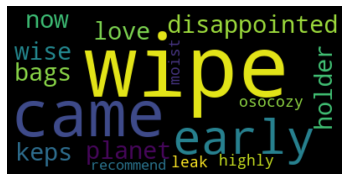

In [0]:
wordcloud = WordCloud(max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

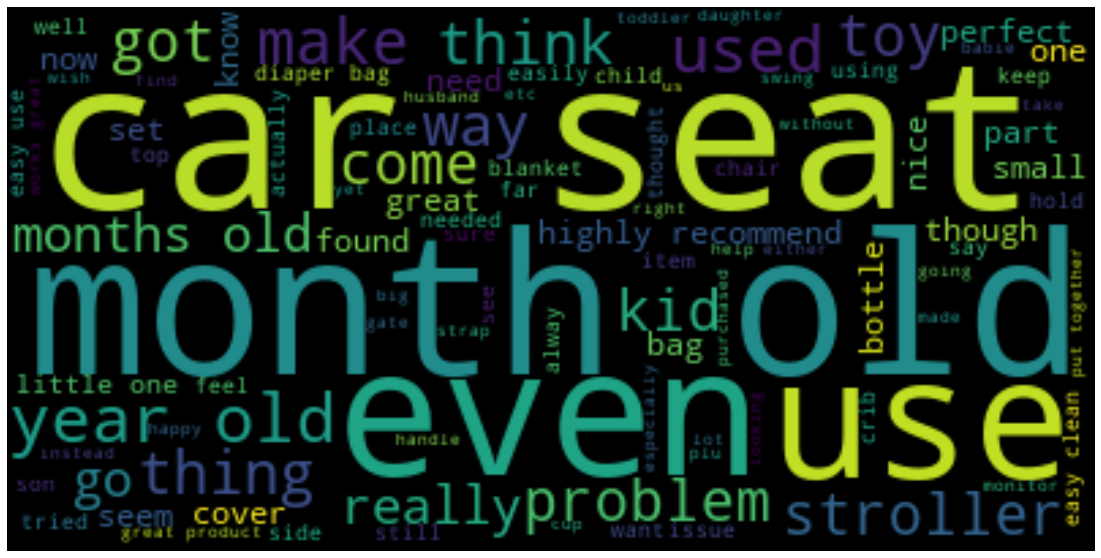

In [0]:
text = " ".join(review for review in df.review_clean)
wordcloud = WordCloud(max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
#So we see that some words like 'perfect', 'problem' have higher frequency of occurring.
#Apart from these, there are total of 193 important words listed in a json file
#So, let's begin
#Counting number of words in reviews
import json
with open('important_words.json') as important_words_file:    
    important_words = json.load(important_words_file)
print(important_words[:3])



['baby', 'one', 'great']


In [0]:
for word in important_words:
    df[word] = df['review_clean'].apply(lambda s : s.split().count(word))
df.head(1)


,name,rating,review_clean,sentiment,baby,one,great,love,use,would,like,easy,little,seat,old,well,get,also,really,son,time,bought,product,good,daughter,much,loves,stroller,put,months,car,still,back,used,recommend,first,even,perfect,nice,bag,...,looks,second,piece,box,pretty,trying,difficult,together,though,give,started,anything,last,company,come,returned,maybe,took,broke,makes,stay,instead,idea,head,said,less,went,working,high,unit,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Planetwise Wipe Pouch,5,it came early and was not disappointed. i love...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df['contains_perfect'] = df['perfect'] >=1
print(df['contains_perfect'].sum())

10271


In [0]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    feature_matrix = features_frame.to_numpy()
    label_sarray = dataframe[label]
    label_array = label_sarray.to_numpy()
    return(feature_matrix, label_array)

feature_matrix, sentiment = get_numpy_data(df, important_words, 'sentiment')

In [0]:
print(feature_matrix.shape)

(166752, 194)


In [0]:
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    # YOUR CODE HERE
    score = np.dot(feature_matrix, coefficients) # N * 1
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    # YOUR CODE HERE
    predictions = 1.0/(1+np.exp(-score))
    
    # return predictions
    return predictions

def feature_derivative(errors, feature):     
    # Compute the dot product of errors and feature
    derivative = np.dot(np.transpose(errors), feature)
    # Return the derivative
    return derivative

def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    # scores.shape (53072L, 1L)
    # indicator.shape (53072L,)
    lp = np.sum((np.transpose(np.array([indicator]))-1)*scores - np.log(1. + np.exp(-scores)))
    return lp

    

In [0]:
from math import sqrt
def logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    # lplist = []
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_1,w) using your predict_probability() function
        # YOUR CODE HERE
        predictions = predict_probability(feature_matrix, coefficients)

        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)

        # Compute the errors as indicator - predictions
        errors = np.transpose(np.array([indicator])) - predictions

        for j in range(len(coefficients)): # loop over each coefficient
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j]
            # compute the derivative for coefficients[j]. Save it in a variable called derivative
            # YOUR CODE HERE
            derivative = feature_derivative(errors, feature_matrix[:,j])

            # add the step size times the derivative to the current coefficient
            # YOUR CODE HERE
            coefficients[j] += step_size*derivative

        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            # lplist.append(compute_log_likelihood(feature_matrix, sentiment, coefficients))
            lp = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            print('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))

        return coefficients

In [0]:
initial_coefficients = np.zeros((194,1))
step_size = 1e-7
max_iter = 301

In [0]:
coefficients = logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter)

iteration   0: log likelihood of observed labels = -114809.90627878


In [0]:
coefficients = logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter)

iteration   0: log likelihood of observed labels = -114809.90627878


In [0]:
predictions = predict_probability(feature_matrix, coefficients)
NumPositive = (predictions > 0.5).sum()
print(NumPositive)

score = np.dot(feature_matrix, coefficients) # N * 1
print((score > 0).sum())

166752
166752


In [0]:
correct_num = np.sum((np.transpose(predictions.flatten())> 0.5) == np.array(df['sentiment']>0))
total_num = len(df['sentiment'])
print("correct_num: {}, total_num: {}".format(correct_num, total_num))
accuracy = correct_num * 1./ total_num
print(accuracy)

correct_num: 140259, total_num: 166752
0.8411233448474381


In [0]:
coefficients = list(coefficients[1:]) # exclude intercept
word_coefficient_tuples = [(word, coefficient) for word, coefficient in zip(important_words, coefficients)]
word_coefficient_tuples = sorted(word_coefficient_tuples, key=lambda x:x[1], reverse=True)

Finally, we get our top 10 positive words and top 10 negative words, which we can use to scan through the database and find corresponding products for which these reviews are given.

In [0]:
word_coefficient_tuples[:10]

[('baby', array([0.00182375])),
 ('one', array([0.00176195])),
 ('little', array([0.00149305])),
 ('love', array([0.00147175])),
 ('great', array([0.00146265])),
 ('easy', array([0.00144545])),
 ('like', array([0.0013905])),
 ('use', array([0.0013472])),
 ('would', array([0.00122275])),
 ('get', array([0.0009881]))]

In [0]:
word_coefficient_tuples[-10:]

[('unit', array([2.64e-05])),
 ('cheap', array([2.36e-05])),
 ('amazon', array([1.855e-05])),
 ('company', array([1.45e-05])),
 ('won', array([3.5e-06])),
 ('broke', array([-1.24e-05])),
 ('returned', array([-2.95e-05])),
 ('disappointed', array([-3.945e-05])),
 ('return', array([-5.395e-05])),
 ('waste', array([-5.635e-05]))]

In [0]:
df[df['review_clean'].str.contains('waste')]

,name,rating,review_clean,sentiment,baby,one,great,love,use,would,like,easy,little,seat,old,well,get,also,really,son,time,bought,product,good,daughter,much,loves,stroller,put,months,car,still,back,used,recommend,first,even,perfect,nice,bag,...,piece,box,pretty,trying,difficult,together,though,give,started,anything,last,company,come,returned,maybe,took,broke,makes,stay,instead,idea,head,said,less,went,working,high,unit,seems,picture,completely,wish,buying,babies,won,tub,almost,either,contains_perfect,constant
45,"SoftPlay Cloth Book, Love",1,This book is boring. Nothing to stimulate my g...,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
63,Hunnt&reg; Falling Flowers and Birds Kids Nurs...,1,The reason:Small sizeHard to apply on the wall...,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
82,New Style Trailing Cherry Blossom Tree Decal R...,1,Was so excited to get this product for my baby...,-1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
140,Fisher Price Nesting Action Vehicles,5,My son Cameron just loves these great little s...,1,0,0,3,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
276,Sassy Busy Bugs Bar,1,This is a horrible product - because the base ...,-1,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166300,#1 Baby Bottle Brush for All Types of Bottles ...,1,Very poor quality. Arrived poorly packaged an...,-1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
166465,Giftoyou(TM) High Quality Lightweight Retracta...,1,I was so happy when i bought this charger for ...,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
166472,Geleeo Universal Stroller Cooling Pad - Pink,2,"I agree with the reviewer below, this pad you ...",-1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
166509,Nicerocker big Cute Sweet Kids Baby Girls Love...,1,I only ordered one of this item and received 2...,-1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1
